In [5]:
import sqlite3

count =0
ligncount = 0


def writeline(file, row):
    file.write(str(row[0])+',')
    file.write(str(ligncount)+',')
    file.write(display(row[7])+' '+display(row[1])+',')
    file.write(str(row[2])+',')
    file.write(str(row[3])+',')
    file.write(str(row[4])+',')
    file.write(str(row[5])+',')
    file.write(str(row[6])+'\n')   
    

def Create_New_File(filename):
    global count
    count+=1
    print(count)
    file  = open(filename,'w')
    file.write('Id, rank, address, geohash, OriginId,Latitude,Longitude,CloseLocationNumber\n')
    return file

def display(t):
    return '' if t==None else str(t)

#def CreateFile(count):
#    Create_New_File('./data/locations_rich_sub{0}.csv'.format(count))
    

In [6]:
def ExportQuery(query, FileName):
    def GetName(name):
        return name + str(localcount) + '.csv'
    ligncount = 0
    localcount=0
    con = sqlite3.connect('./data/location.s3db')
    cur = con.cursor()
    file  = Create_New_File(GetName(FileName))
    for row in cur.execute(query):
        writeline(file, row)
        ligncount +=1
        if ligncount== 2000:
            ligncount = 0
            file.close()
            localcount+=1
            file = Create_New_File(GetName(FileName))  
    con.close()
    file.close()

In [13]:
#query="select Id, StreetName, GeoHash, OriginId,Latitude,Longitude,CloseLocationNumber, StreetNumber from LocationReferenced where ;"
query="select Id, StreetName, GeoHash, OriginId,Latitude,Longitude,CloseLocationNumber, StreetNumber from LocationReferenced where StreetNumber=0 and StreetName='Rutland Avenue'";
ExportQuery(query, './data/Ru_Drive')

5


In [10]:
from geolocation import GeoLocation
from geopy.distance import great_circle
import geohash
import sqlite3

def GeoEncodeFromLocation(loc):
    return geohash.encode(loc.deg_lat, loc.deg_lon, 32)

def GetBoundingGeoCode(lat, long, dist=0.01):
    loc = GeoLocation.from_degrees(lat,long)
    SW_loc, NE_loc = loc.bounding_locations(dist)
    return (NE_loc.deg_lat - SW_loc.deg_lat,  NE_loc.deg_lon -SW_loc.deg_lon)


GetBoundingGeoCode(42.331667, -83.0475, 0.03)


(0.000538992297201446, 0.0007290980402387959)

In [22]:
ExportQuery("select Id, StreetName, GeoHash, OriginId,Latitude,Longitude,CloseLocationNumber, StreetNumber from Locationreferenced where StreetName='Woodingham Drive';",'./data/Woodingham_Drive')

3


In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
con = sqlite3.connect('./data/location.s3db')
cur = con.cursor()
Lats =[]
Longs = []
for row in cur.execute("select Latitude,Longitude from Locationreferenced where StreetName='Woodingham Drive' and Geohash!='' and Geohash!='s0000000000000000000000000000000';"):
    Lat, Long = row
    Lats.append(Lat)
    Longs.append(Long)

arraylats = np.asarray(Lats)    
#s = np.shape(arraylats)
#arraylats.reshape(s[0],1)
arraylats = arraylats.reshape(len(arraylats),1)

arraylongs = np.asarray(Longs)    
#s = np.shape(arraylongs)
arraylongs = arraylongs.reshape(len(arraylongs),1)

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(arraylats,arraylongs)

# The coefficients
print('Coefficients: \n', regr.coef_)
   
    
    

Coefficients: 
 [[-0.54058355]]


In [48]:
dict(regr)

TypeError: 'LinearRegression' object is not iterable

In [49]:
print('Variance score: %.2f' % regr.score(arraylats, arraylongs))

Variance score: 1.00


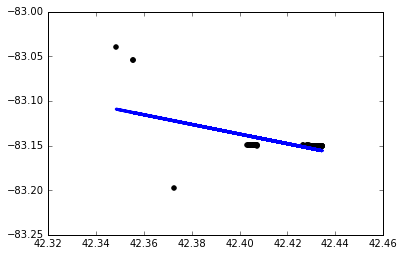

In [23]:
%matplotlib inline
plt.scatter(arraylats, arraylongs,  color='black')
plt.plot(arraylats, regr.predict(arraylats), color='blue', linewidth=3)
